In [1]:
!pip install baselines --no-deps

     |████████████████████████████████| 123 kB 24.4 MB/s 
  Created wheel for baselines: filename=baselines-0.1.5-py3-none-any.whl size=163902 sha256=d848e7a4cbfb59c2fad73270ffd28eb2a35853d438aebd07c70ed38f0aa2e553
  Stored in directory: /root/.cache/pip/wheels/64/27/40/3b266f230c825e6b219bfdd5447566d4d109b66fc4e0c074ed
Successfully built baselines


In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python -m atari_py.import_roms /content/drive/MyDrive/game_ai/roms

In [10]:
from baselines.common.atari_wrappers import make_atari , wrap_deepmind 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import gym

seed = 42
model = keras.models.load_model('/content/drive/MyDrive/game_ai/models/model_2.keras', compile=False)

In [11]:
env = make_atari("BreakoutNoFrameskip-v4")
env = wrap_deepmind(env, frame_stack=True, scale=True) 
env.seed(seed)
env = gym.wrappers.Monitor(env,'/content/drive/MyDrive/game_ai/videos', video_callable= lambda episode_id:True, force=True)

In [12]:
n_episodes = 10 
returns = []

for _ in range(n_episodes): 
  ret=0
  state = np.array(env.reset())
  done = False 

  while not done:

    # Testing implemented 
    state_tensor = tf.convert_to_tensor(state)
    state_tensor = tf.expand_dims(state_tensor, 0)

    action_probs = model(state_tensor, training=False)

    action = tf.argmax(action_probs[0]).numpy()

    state_next, reward, done, info = env.step(action)
    state = np.array(state_next)

    ret += reward
  returns.append(ret)

  env.close()
print('Returns: {}'.format(returns))

Returns: [30.0, 14.0, 8.0, 10.0, 0.0, 56.0, 6.0, 5.0, 0.0, 0.0]


Loading the saved reward history and creating sliding windows of size 100

In [13]:
ep_rew_hist = np.load('/content/drive/MyDrive/game_ai/models/reward_History_2.npy')

con_hist = np.convolve(ep_rew_hist, np.ones(100)/100, mode='valid')

Plotting the Episodic Reward History

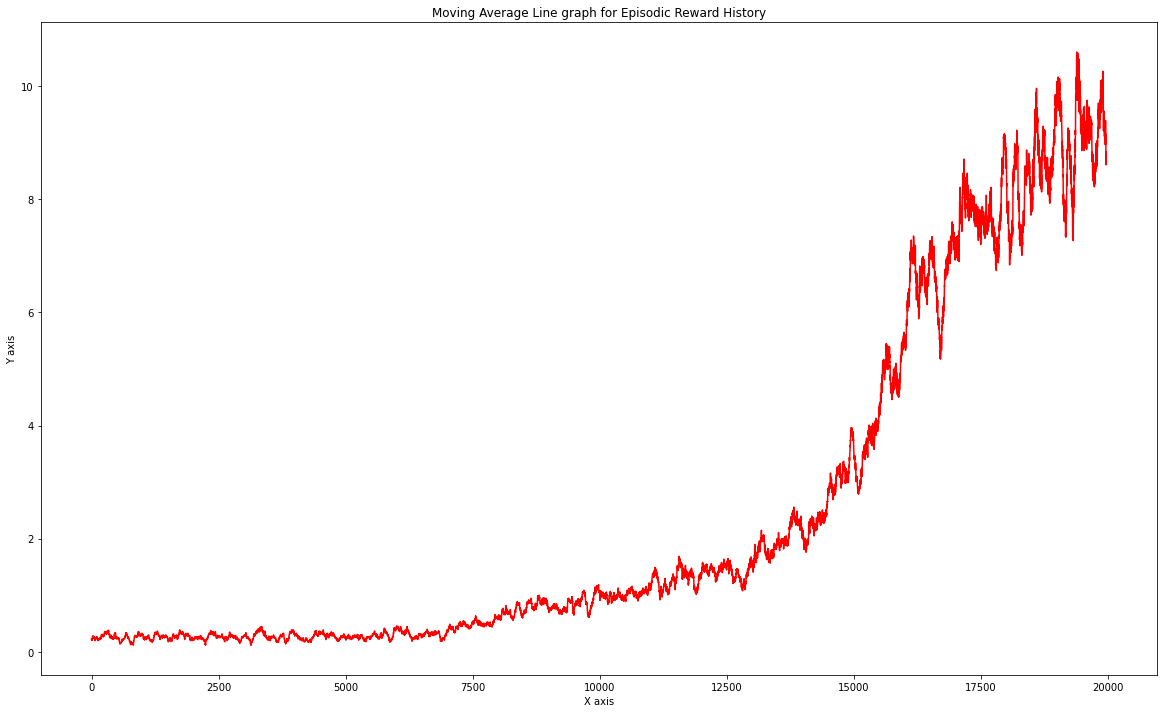

In [14]:
import matplotlib.pyplot as plt
 
# data to be plotted
x = np.arange(0, len(con_hist))
y = con_hist

plt.figure(figsize=(20,12))

# plotting
plt.title("Moving Average Line graph for Episodic Reward History")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(x, y, color ="red")
plt.show()